In [ ]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'mxmh-survey-results:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2659407%2F4556243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T165716Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D139cb1555ff7c7a6ce5db0ad0cf92a00a31931ebac16bf68cb18c389b3fc1d98fd5230a5c4371ff4c5c533cda71f8fc1c9c9720c0f152e06844de9d5fc257f284c89a7c99551ceeb4ee5fbbae58a45db3c6945b5fab485feae01f0aeccad4e098096a32df5929bb9cc4ced9be0b39bca1acf365a5a38c9e1297b1507b9299bc3fa3ea2589537b967b504757d0d000ebfead9d3354443de6e3b4be9b5e0babb17d0390f88635e55b79ed6262a5bb4e6931bf3e83ade01f63a860fd0455295c13f4d1de9d53a906c2b4918e673a410a4b3f7af4cece5fd84f090962d9e93c44bbabc471ce4e2f9294b8d219b22aa6695f4f26225fe247ef8d4f93cbbc45e244e16'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# filename = '/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv'
filename = '/content/drive/MyDrive/Applied ML Group 18/mxmh_survey_results.csv'
#filename = 'mxmh_survey_results.csv'
data = pd.read_csv(filename)
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [ ]:
# look for the columns that have NaN/empty values
print(data.isna().sum())
# get the number of rows with NaN values
nan_values = data[data.isna().any(axis=1)]
print("Number of rows with missing values: ", len(nan_values)) # total is 134 rows

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
#preprocessing
#Since the dataset is small, we will use mean, mode and KNN imputation to fill missing values instead of dropping the rows.
#We can drop timestamp and permissions columns as it doesn't really account for any predictions.

data['Age'].fillna(data['Age'].mean().astype(int), inplace=True)
categorical_columns = ['Primary streaming service', 'Composer', 'Instrumentalist', 'While working', 'Foreign languages']

for col in categorical_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)


data.dropna(subset=["Music effects"], inplace=True)
data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    float64
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
# drop columns we don't need
columns_to_drop = ['Timestamp', 'Permissions', 'BPM']

if 'BPM' in data:
  data.drop(columns=columns_to_drop, inplace=True)

<ipython-input-36-a5dffa1fdb0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax)


<Axes: >

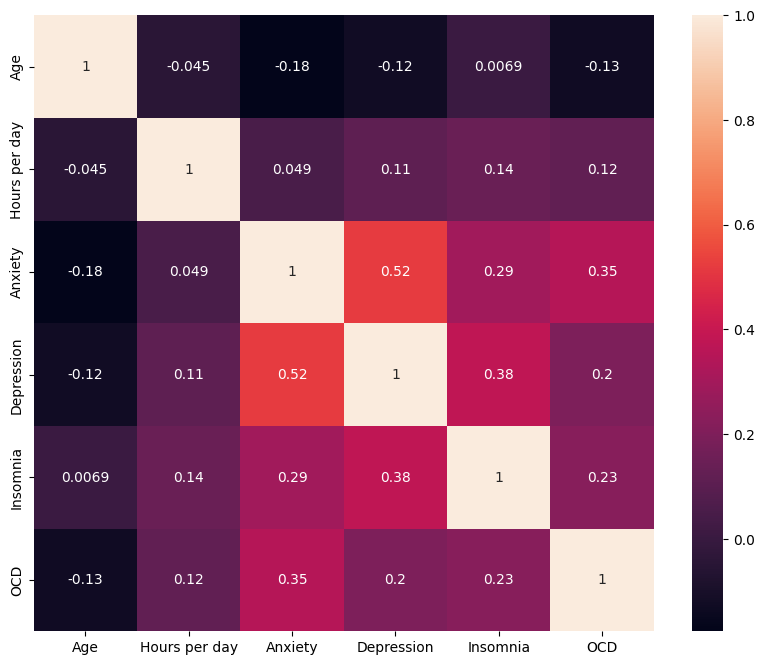

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

Text(0.5, 0, 'Ages')

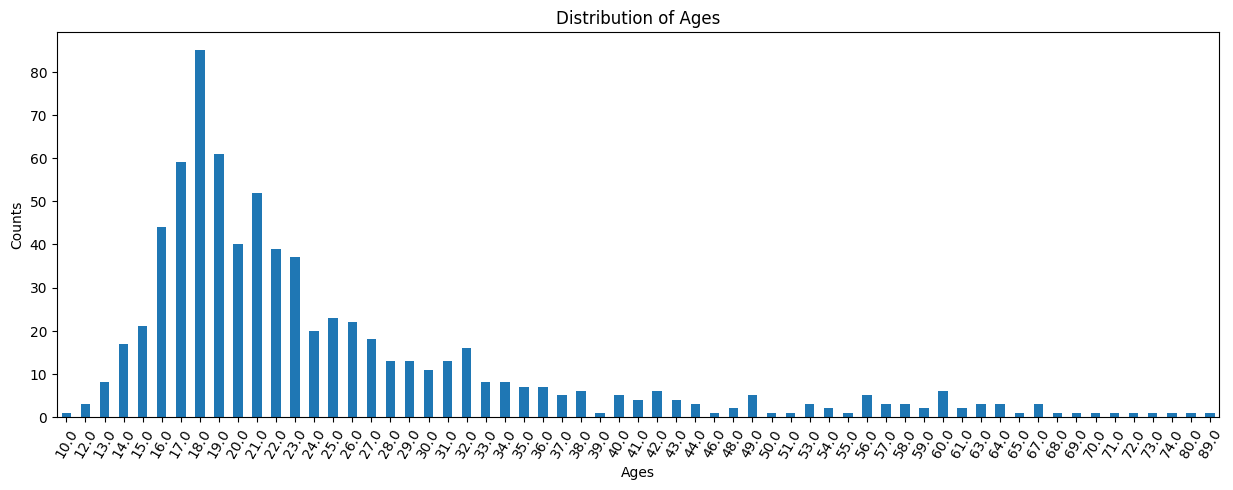

In [ ]:
ax = data['Age'].value_counts().sort_index().plot(kind = 'bar', rot=60, figsize=(15,5))
ax.set_title('Distribution of Ages')
ax.set_ylabel('Counts')
ax.set_xlabel('Ages')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

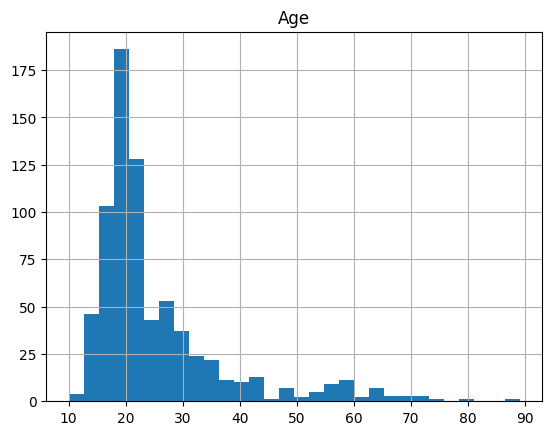

In [ ]:
data.hist(['Age'], bins=30, grid=True)


Text(0.5, 1.0, 'Histogram of ages')

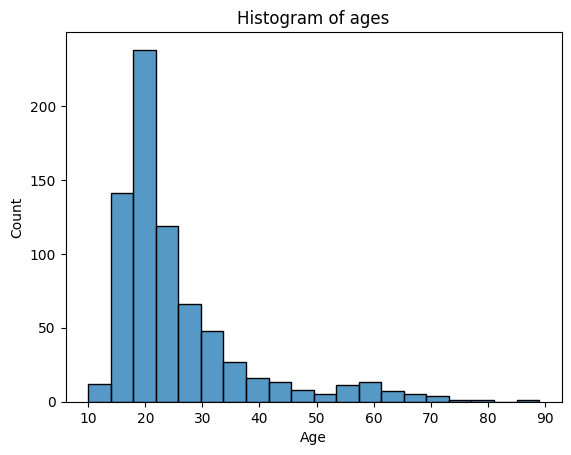

In [ ]:
ax = sns.histplot(data['Age'], bins=20)
ax.set_title('Histogram of ages')


In [ ]:
from collections import defaultdict

# age ranges are 18-24, 25-34, 35-44, 45-54, 55-64 and 65 and over
# age range queries

AGE_RANGE_QUERIES_DICT = {
  '17_under': pd.DataFrame(data.loc[data['Age'] <= 17.0]),
  '18_to_24': pd.DataFrame(data.loc[(data['Age'] >= 18.0) & (data['Age'] <= 24.0)]),
  '25_to_34': pd.DataFrame(data.loc[(data['Age'] >= 25.0) & (data['Age'] <= 34.0)]),
  '35_to_44': pd.DataFrame(data.loc[(data['Age'] >= 35.0) & (data['Age'] <= 44.0)]),
  '45_to_54': pd.DataFrame(data.loc[(data['Age'] >= 45.0) & (data['Age'] <= 54.0)]),
  '55_to_64': pd.DataFrame(data.loc[(data['Age'] >= 55.0) & (data['Age'] <= 64.0)]),
  '65_over': pd.DataFrame(data.loc[data['Age'] >= 65.0])
}

def get_counts_for_age_ranges(col=None):
  # age range query results
  results = defaultdict(list)

  for key in AGE_RANGE_QUERIES_DICT.keys():
    results[key] = AGE_RANGE_QUERIES_DICT[key][col].value_counts()

  return results

def get_rows_for_age_ranges(col=None):
  # age range query results
  results = defaultdict(list)

  for key in AGE_RANGE_QUERIES_DICT.keys():
    results[key] = AGE_RANGE_QUERIES_DICT[key][col]

  return results

In [ ]:
age_range_counts = {key: len(AGE_RANGE_QUERIES_DICT[key]) for key in AGE_RANGE_QUERIES_DICT.keys()}
age_range_counts


{'17_under': 153,
 '18_to_24': 334,
 '25_to_34': 145,
 '35_to_44': 48,
 '45_to_54': 15,
 '55_to_64': 28,
 '65_over': 13}

Text(0, 0.5, 'Counts')

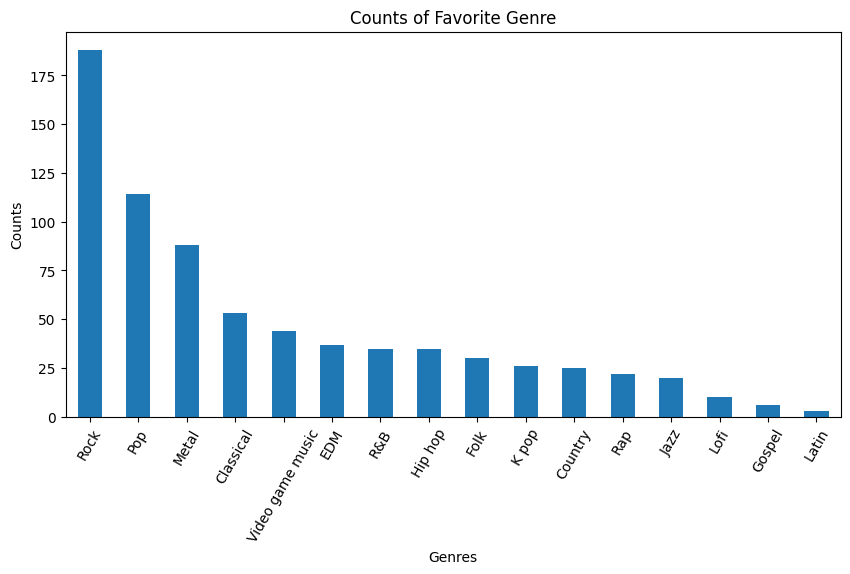

In [ ]:
ax = data['Fav genre'].value_counts().plot(kind = 'bar', rot=60, figsize=(10,5))
ax.set_title('Counts of Favorite Genre')
ax.set_xlabel('Genres')
ax.set_ylabel('Counts')


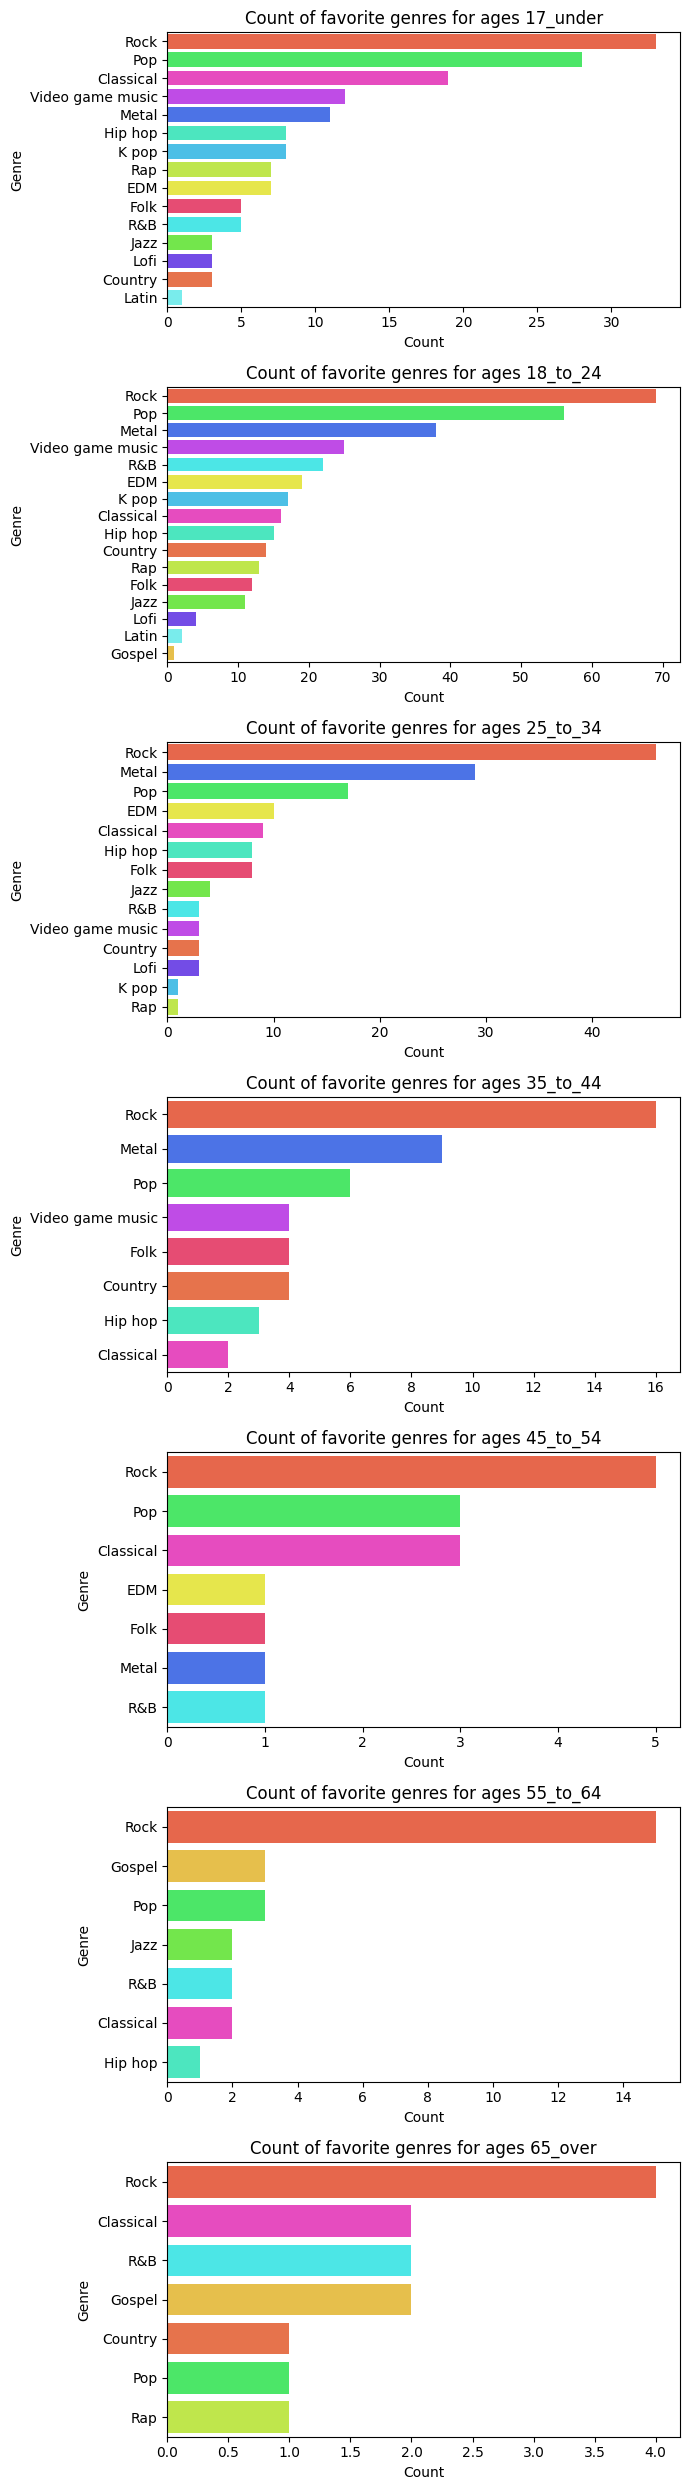

In [ ]:
fav_genre_by_age_counts = get_counts_for_age_ranges('Fav genre')
fave_genre_df = pd.DataFrame.from_dict(fav_genre_by_age_counts)
# fave_genre_df.fillna(0, inplace=True)
fave_genre_df

# sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(7, figsize=(7,25))

palette={
    'Rock':'#FF5733',
    'Pop':'#33FF57',
    'Metal':'#3366FF',
    'Classical':'#FF33CC',
    'Video game music':'#CC33FF',
    'EDM':'#FFFF33',
    'R&B': '#33FFFF',
    'K pop':'#33CCFF',
    'Folk':'#FF3366',
    'Jazz':'#66FF33',
    'Country':'#FF6633',
    'Hip hop':'#33FFCC',
    'Rap':'#CCFF33',
    'Lofi':'#6633FF',
    'Gospel':'#FFCC33',
    'Latin':'#66FFFF'
    }

ax_count = 0
for key in fav_genre_by_age_counts.keys():
  sns.barplot(ax=axes[ax_count], y=fav_genre_by_age_counts[key].index, x=fav_genre_by_age_counts[key].values, hue=fav_genre_by_age_counts[key].index,
    palette=palette, orient = 'h')
  axes[ax_count].set_title('Count of favorite genres for ages ' + key)
  axes[ax_count].set_ylabel('Genre')
  axes[ax_count].set_xlabel('Count')
  axes[ax_count].tick_params(axis='x')
  ax_count+= 1

fig.tight_layout()

plt.show()

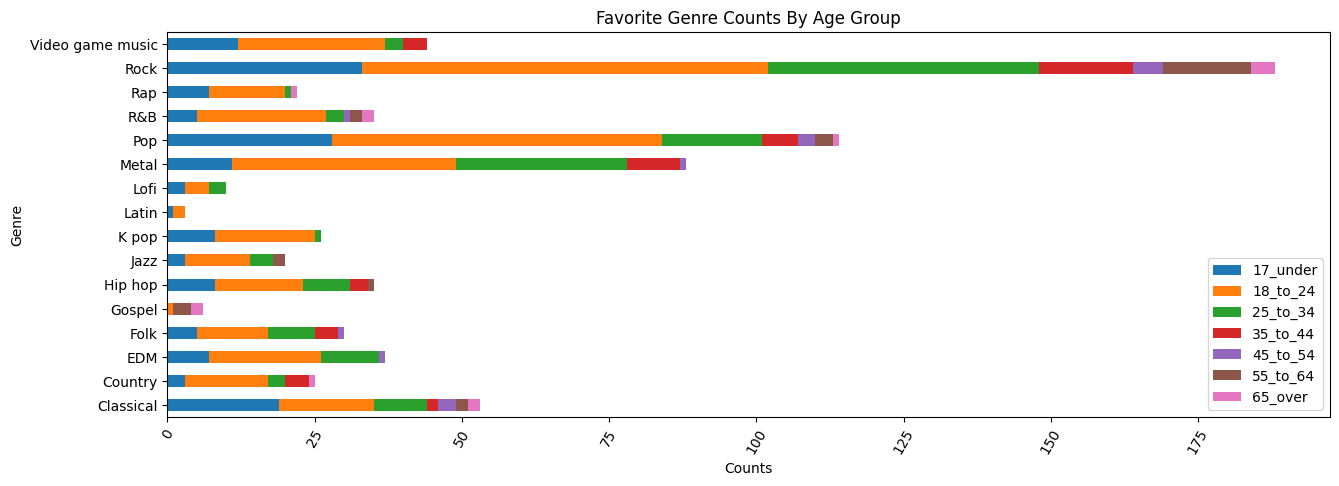

In [ ]:
ax = fave_genre_df.plot.barh(stacked=True, figsize=(15, 5))
# ax.bar_label(ax.containers[0])

ax.set_title('Favorite Genre Counts By Age Group')
ax.set_xlabel('Counts')
ax.set_ylabel('Genre')
ax.tick_params(axis='x', rotation=60)
plt.show()

Text(0.5, 0, 'Score')

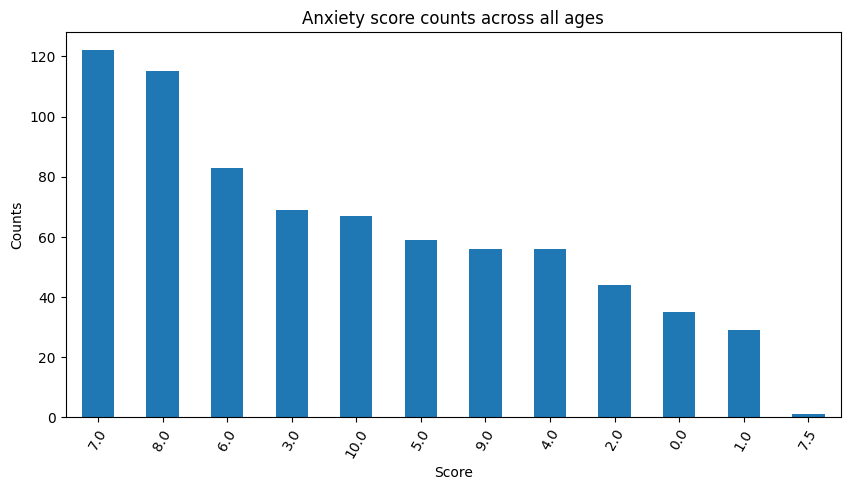

In [ ]:
ax = data['Anxiety'].value_counts().plot(kind = 'bar', rot=60, figsize=(10,5))
ax.set_title('Anxiety score counts across all ages')
ax.set_ylabel('Counts')
ax.set_xlabel('Score')

In [ ]:
anxiety_by_age_counts = get_rows_for_age_ranges('Anxiety')
avg_anxiety_age_group = {key:np.mean(anxiety_by_age_counts[key]) for key in anxiety_by_age_counts.keys()}
avg_anxiety_age_group

{'17_under': 6.049019607843137,
 '18_to_24': 5.967065868263473,
 '25_to_34': 6.1931034482758625,
 '35_to_44': 5.8125,
 '45_to_54': 2.6666666666666665,
 '55_to_64': 3.7142857142857144,
 '65_over': 4.384615384615385}

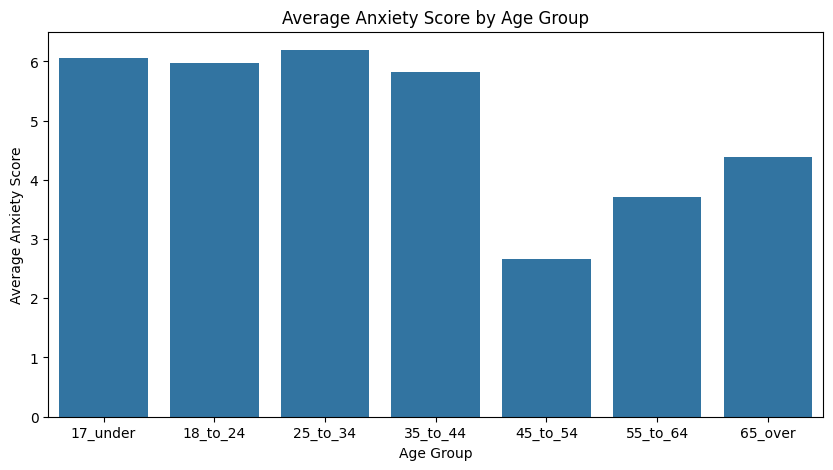

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=avg_anxiety_age_group.keys(), y=avg_anxiety_age_group.values())
ax.set_ylabel('Average Anxiety Score')
ax.set_xlabel('Age Group')
ax.set_title('Average Anxiety Score by Age Group')

plt.show()

In [ ]:
depression_by_age_rows = get_rows_for_age_ranges('Anxiety')
avg_depression_age_group = {key:np.mean(depression_by_age_rows[key]) for key in depression_by_age_rows.keys()}
avg_depression_age_group

{'17_under': 6.049019607843137,
 '18_to_24': 5.967065868263473,
 '25_to_34': 6.1931034482758625,
 '35_to_44': 5.8125,
 '45_to_54': 2.6666666666666665,
 '55_to_64': 3.7142857142857144,
 '65_over': 4.384615384615385}

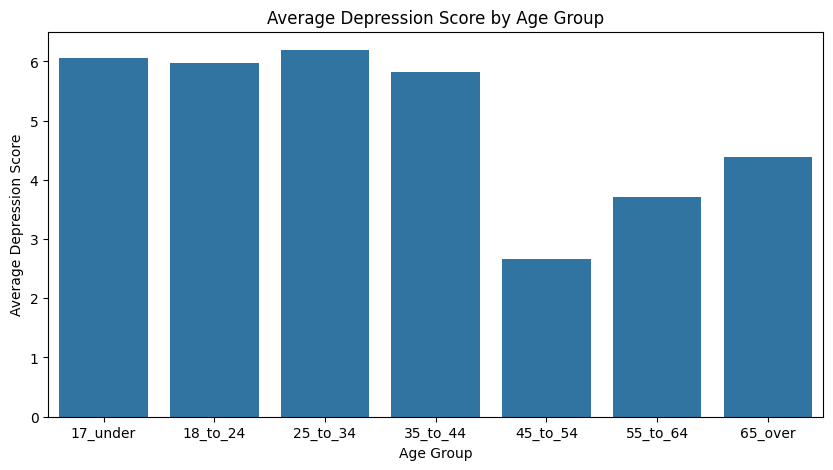

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=avg_depression_age_group.keys(), y=avg_depression_age_group.values())
ax.set_ylabel('Average Depression Score')
ax.set_xlabel('Age Group')
ax.set_title('Average Depression Score by Age Group')

plt.show()

In [ ]:
insomnia_by_age_rows = get_rows_for_age_ranges('Insomnia')
avg_insomnia_age_group = {key:np.mean(insomnia_by_age_rows[key]) for key in insomnia_by_age_rows.keys()}
avg_insomnia_age_group

{'17_under': 3.866013071895425,
 '18_to_24': 3.5419161676646707,
 '25_to_34': 3.9448275862068964,
 '35_to_44': 4.604166666666667,
 '45_to_54': 2.6666666666666665,
 '55_to_64': 3.8214285714285716,
 '65_over': 2.8461538461538463}

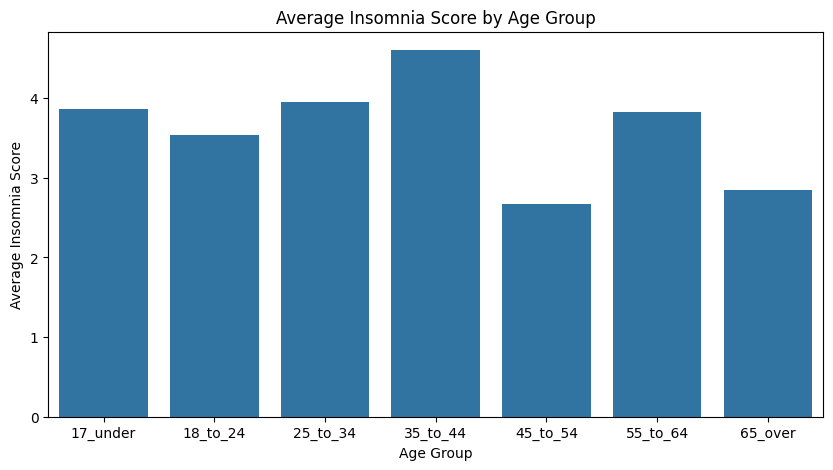

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=avg_insomnia_age_group.keys(), y=avg_insomnia_age_group.values())

ax.set_ylabel('Average Insomnia Score')
ax.set_xlabel('Age Group')

ax.set_title('Average Insomnia Score by Age Group')

plt.show()

In [ ]:
ocd_by_age_rows = get_rows_for_age_ranges('OCD')
avg_ocd_age_group = {key:np.mean(ocd_by_age_rows[key]) for key in ocd_by_age_rows.keys()}
avg_ocd_age_group

{'17_under': 3.026143790849673,
 '18_to_24': 2.7065868263473054,
 '25_to_34': 2.696551724137931,
 '35_to_44': 2.3333333333333335,
 '45_to_54': 0.8666666666666667,
 '55_to_64': 1.5714285714285714,
 '65_over': 1.0769230769230769}

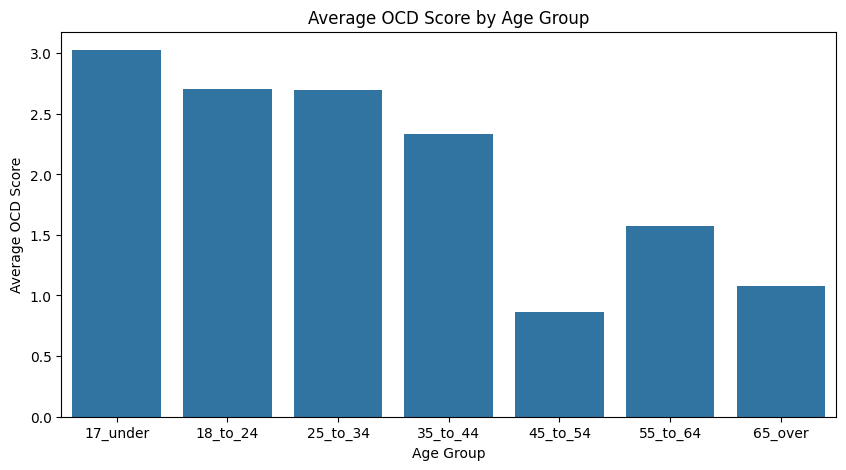

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=avg_ocd_age_group.keys(), y=avg_ocd_age_group.values())
ax.set_ylabel('Average OCD Score')
ax.set_xlabel('Age Group')
ax.set_title('Average OCD Score by Age Group')

plt.show()

In [ ]:
# split data into features and labels
cols_to_predict = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
X_data1 = data.drop(columns=cols_to_predict)
y_data1 = data[cols_to_predict].to_numpy() # creates an array for each row of 4 columns

X_data2 = data.drop(columns=['Favorite Genre'])
y_data2 = data['Favorite Genre']


# split the dataset to get the test set and initial training set
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_data1,
    y_data1,
    train_size=0.80,
    test_size=0.20,
    random_state=42
)


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_data2,
    y_data2,
    train_size=0.80,
    test_size=0.20,
    stratify=y_data2,
    random_state=42
)

print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

In [ ]:
# SMOTE

sm = SMOTE(random_state=42)
X_train1_sm, y_train1_sm = sm.fit_resample(X_train1, y_train1)

X_train2_sm, y_train2_sm = sm.fit_resample(X_train2, y_train2)
